<span style="font-size: 20px;">**1. Data Collection: Crawling for data sample by Selenium**</span>

In [13]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementNotInteractableException, NoSuchElementException
import random
from time import sleep
import requests
import pandas as pd

In [147]:
def load_data_tiki(url):
    # Delacre browser
    driver=webdriver.Chrome()

    # Open URL
    driver.get(url)
    # Generate a random integer between 5 and 10
    random_delay = random.randint(5, 10)
    # Pause the execution for loading page
    sleep(random_delay)

    #Scoll down slowly to load the content
    for i in range(4):
        # Execute JavaScript to scroll the page
        driver.execute_script(f"window.scrollBy(0, 500);")
        sleep(3)

    count=1
    name_user,comments,category,comments_extra =[],[],[],[]
    
    while True:
        try:
            if count == 1 or count%10 == 0:
                print('Start crawl data page ', str(count))
                
            elem_name_user = driver.find_elements(By.CSS_SELECTOR,'.review-comment__user-name')
            name_user = [ e.text for e in elem_name_user ] + name_user

            elem_category = driver.find_elements(By.CSS_SELECTOR,'.review-comment__attributes--item')
            category = [ e.text for e in elem_category ] + category
            
            #------Show more content----
            try:
                elem_show_more_comment = driver.find_element(By.CSS_SELECTOR,'.show-more-content')
                elem_show_more_comment.click()
                sleep(3)
            except NoSuchElementException:
                pass
            #---------------------------    
            
            elem_comment = driver.find_elements(By.CSS_SELECTOR,'.review-comment__content')
            comments = [ e.text for e in elem_comment ] + comments

            elem_comment_extra = driver.find_elements(By.CSS_SELECTOR,'.review-comment__title')
            comments_extra = [ e.text for e in elem_comment_extra ] + comments_extra
            
            if count == 1 or count%10 == 0:
                print('Crawling data page {} successful'.format(str(count)))
                
            #------Navigation----
            next_navigation_button = driver.find_element(By.CSS_SELECTOR, '.btn.next')
            next_navigation_button.click()
            sleep(3)
            #--------------------
            
            #Close pop up (if any)
            '''
            try:
                close_button = driver.find_element(By.CSS_SELECTOR,'.baxia-dialog-close') #('xpath','/html/body/div[7]/div[2]/div')
                sleep(5)
                close_button.click()
                count += 1
                sleep(5)
            except NoSuchElementException:
                continue
            '''
            count += 1
        except NoSuchElementException or ElementNotInteractableException: #We are crawling the end page.
            break
            
    df_crawl = pd.DataFrame({'User_name' : name_user 
                       ,'Category' : category
                       ,'Comments' : comments
                       ,'Comments_extra':comments_extra
                      })
    driver.close()
    return df_crawl

In [150]:
df_Laz_Crawl=load_data_tiki('https://tiki.vn/son-kem-li-black-rouge-air-fit-velvet-tint-han-quoc-p31874925.html?spid=44245482')

Start crawl data page  1
Crawling data page 1 successful
Start crawl data page  10
Crawling data page 10 successful
Start crawl data page  20
Crawling data page 20 successful
Start crawl data page  30
Crawling data page 30 successful
Start crawl data page  40
Crawling data page 40 successful
Start crawl data page  50
Crawling data page 50 successful
Start crawl data page  60
Crawling data page 60 successful
Start crawl data page  70
Crawling data page 70 successful
Start crawl data page  80
Crawling data page 80 successful
Start crawl data page  90
Crawling data page 90 successful
Start crawl data page  100
Crawling data page 100 successful
Start crawl data page  110
Crawling data page 110 successful
Start crawl data page  120
Crawling data page 120 successful
Start crawl data page  130
Crawling data page 130 successful
Start crawl data page  140
Crawling data page 140 successful
Start crawl data page  150
Crawling data page 150 successful
Start crawl data page  160
Crawling data page 

In [153]:
df_Laz_Crawl.to_csv('Laz_Crawl.csv', index=False)

In [73]:
df_Laz_Crawl= pd.read_csv('Laz_Crawl.csv')

In [74]:
df_Laz_Crawl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_name       1861 non-null   object
 1   Category        1861 non-null   object
 2   Comments        709 non-null    object
 3   Comments_extra  1861 non-null   object
dtypes: object(4)
memory usage: 58.3+ KB


<span style="font-size: 20px;">**2. Data Preprocessing**</span>

In [156]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [40]:
!pip install underthesea

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import re
import underthesea
from underthesea import pos_tag,sent_tokenize, word_tokenize, chunk
import emoji

In [75]:
#Replace null review by other mandatory field
df_Laz_Crawl['Comments_merge'] = df_Laz_Crawl['Comments'].fillna(df_Laz_Crawl['Comments_extra'])
df_Laz_Crawl

,User_name,Category,Comments,Comments_extra,Comments_merge
0,Do Thi Thuyet,Màu : A05 - cam đỏ,NaN,Bình thường,Bình thường
1,Ly Phạm,Màu : A06 - đỏ nâu,NaN,Hài lòng,Hài lòng
2,Tuyền Mèo,Màu : A11 - hồng cháy,NaN,Bình thường,Bình thường
3,Bắp Bắp,Màu : A12 - nâu gạch,NaN,Hài lòng,Hài lòng
4,Dương Lê,Màu : A10 - đỏ berry,NaN,Rất không hài lòng,Rất không hài lòng
...,...,...,...,...,...
1856,Huyền Phạm,Màu : A12 - nâu gạch,đây là lần đầu tiên mik mua hàng ở tiki và rất...,Cực kì hài lòng,đây là lần đầu tiên mik mua hàng ở tiki và rất...
1857,Cao Thanh Nhàn,Màu : A15 - nâu ánh đỏ,sau khi nhận đc hàng thì hài lòng vô cùng ạ. ...,vé rì gút !!,sau khi nhận đc hàng thì hài lòng vô cùng ạ. ...
1858,Nguyên Hương,Màu : A06 - đỏ nâu,Thất vọng thật sự. Muốn mua 1 thỏi son lì mà ...,Cực kì hài lòng,Thất vọng thật sự. Muốn mua 1 thỏi son lì mà ...
1859,Thảo Linh Travel,Màu : A01- đỏ dâu,"Ảnh mình chưa kịp chụp, lo test mã, và test c...",Cực kì hài lòng,"Ảnh mình chưa kịp chụp, lo test mã, và test c..."


In [77]:
def cleaning(text):
    #lower word
    text = text.lower()
    #remove newline characters
    text = re.sub(r'\n', ' ', text)
    #remove special characters
    text = re.sub(r'[.,;:?!()\[\]{}<>^~`\-_\'/@#$%&*+=|\\]', ' ', text)
    #remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    #replace teencode and replace emoji
    teencode_dict = {
                    'ship': 'giao hàng', 'delivery': 'giao hàng', 'síp': 'giao hàng', 'order': 'đặt hàng',
                    'authentic': 'chuẩn chính hãng', 'aut': 'chuẩn chính hãng', 'auth': 'chuẩn chính hãng',
                    'fake': 'giả mạo', 'pha ke': 'giả mạo',
                    'ô kêi': 'ok', 'okie': 'ok', 'o kê': 'ok', 'okey': 'ok', 'ôkê': 'ok', 'oki': 'ok', 'oke': 'ok', 'okay': 'ok', 'okê': 'ok',
                    'tks': 'cảm ơn', 'thks': 'cảm ơn', 'thanks': 'cảm ơn', 'ths': 'cảm ơn', 'thank': 'cảm ơn',
                    'kg': 'không', 'hk': 'không', 'k': 'không', 'kh': 'không', 'kô': 'không', 'hok': 'không', 'ko': 'không', 'khong': 'không', 'kp': 'không phải',
                    'cc': 'tiêu cực','cccc': 'tiêu cực', 'huhu': 'tiêu cực',
                    'gud': 'tốt', 'good': 'tốt', 'gút': 'tốt', 'tot': 'tốt', 'nice': 'tốt', 'perfect': 'rất tốt', 
                    'nt': 'nhắn tin', 'ib': 'nhắn tin', 'tl': 'trả lời', 'trl': 'trả lời', 'rep': 'trả lời',
                    'fback': 'feedback', 'fedback': 'feedback',
                    'sd': 'sử dụng', 'sài': 'xài'
                    }
# !wget https://gist.githubusercontent.com/nguyenvanhieuvn/7d9441c10b3c2739499fc5a4d9ea06fb/raw/df939245b3e841b62af115be4dcb3516dadc9fc5/teencode.txt    
    with open('teencode.txt','r', encoding='utf-8') as file:
        for line in file:
            key, value = line.strip().split('\t')
            teencode_dict[key]=value
    words = []
    for w in text.split():
        if w not in teencode_dict.keys():
            words.append(w)
        else: words.append(teencode_dict[w])
    text = emoji.replace_emoji(' '.join(words), replace='')
   
    #remove continuous duplicate characters and replace with 1st charector in the group.
    text = re.sub(r'(\w)\1+', r'\1', text, flags=re.IGNORECASE)
    
    return text

In [78]:
df_Laz_Crawl['Comments_after_clean'] = df_Laz_Crawl['Comments_merge'].apply(cleaning)
df_Laz_Crawl=df_Laz_Crawl.drop(['Comments','Comments_extra','Comments_merge'],axis=1)
df_Laz_Crawl

,User_name,Category,Comments_after_clean
0,Do Thi Thuyet,Màu : A05 - cam đỏ,bình thường
1,Ly Phạm,Màu : A06 - đỏ nâu,hài lòng
2,Tuyền Mèo,Màu : A11 - hồng cháy,bình thường
3,Bắp Bắp,Màu : A12 - nâu gạch,hài lòng
4,Dương Lê,Màu : A10 - đỏ berry,rất không hài lòng
...,...,...,...
1856,Huyền Phạm,Màu : A12 - nâu gạch,mua hàng tiki rất hài lòng giao hàng hộp hơi m...
1857,Cao Thanh Nhàn,Màu : A15 - nâu ánh đỏ,nhận hàng hài lòng vô cùng tiku đóng gói rất k...
1858,Nguyên Hương,Màu : A06 - đỏ nâu,thất vọng mua 1 thỏi son lì test hàng xong chá...
1859,Thảo Linh Travel,Màu : A01- đỏ dâu,ảnh kịp chụp lo test mã test chất xong phòng q...


<span style="font-size: 20px;">**3. Sentiment analysis by underthesea**</span>

In [11]:
from underthesea import sentiment

In [79]:
def classify_sentiment(text):
    result = sentiment(text)
    if result is None:
        return "neutral"
    else:
        return result

df_Laz_Crawl['Sentiment'] = df_Laz_Crawl['Comments_after_clean'].apply(classify_sentiment)
df_Laz_Crawl

,User_name,Category,Comments_after_clean,Sentiment
0,Do Thi Thuyet,Màu : A05 - cam đỏ,bình thường,negative
1,Ly Phạm,Màu : A06 - đỏ nâu,hài lòng,positive
2,Tuyền Mèo,Màu : A11 - hồng cháy,bình thường,negative
3,Bắp Bắp,Màu : A12 - nâu gạch,hài lòng,positive
4,Dương Lê,Màu : A10 - đỏ berry,rất không hài lòng,positive
...,...,...,...,...
1856,Huyền Phạm,Màu : A12 - nâu gạch,mua hàng tiki rất hài lòng giao hàng hộp hơi m...,positive
1857,Cao Thanh Nhàn,Màu : A15 - nâu ánh đỏ,nhận hàng hài lòng vô cùng tiku đóng gói rất k...,positive
1858,Nguyên Hương,Màu : A06 - đỏ nâu,thất vọng mua 1 thỏi son lì test hàng xong chá...,negative
1859,Thảo Linh Travel,Màu : A01- đỏ dâu,ảnh kịp chụp lo test mã test chất xong phòng q...,positive


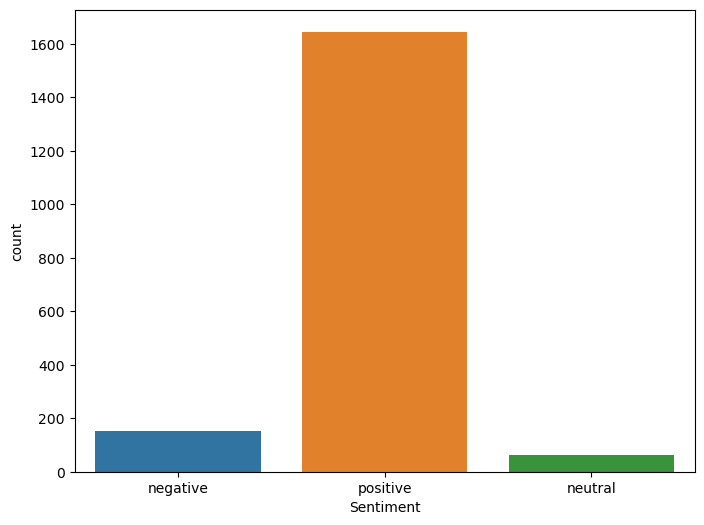

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6)) 
sns.countplot(data=df_Laz_Crawl, x='Sentiment')
plt.show()